# Individual assignment: Machine learning tutorial:
## Forest Fire Prediction Using Machine Learning

#### Importing required libaries


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor



### Framing csv data from url and display first four rows using df_forest_fire.head()

In [6]:
#raeading the csv url
df_forest_fire = pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

#heading first four rows of data from loaded data=
print(df_forest_fire.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


### getting the info of the data frame table using df_forest_fire.info()

In [7]:
df_forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### pre-processed  data for cleaning the missing and duplicates and processing column for the clarity

In [14]:

def cleaning_and_preprocessing(df):
  """
    cleaning and preprocessing the data and returning the data frame
  """
  #cleaning missing values
  df.dropna(inplace=True)
  #removes the duplicate value
  df.drop_duplicates(inplace=True)

  #re naming the columns for better understanding and readability.
  df = df.rename(columns={"temp": "Temperature", "RH": "Humidity", "wind": "WindSpeed", "rain": "Rain", "area": "FireRisk"})

  df["FireRisk"] = np.log1p(df["FireRisk"])

  #processing the data
  df["Temp_Wind"] = df["Temperature"] * df["WindSpeed"]
  df["Humidity_Rain"] = df["Humidity"] * df["Rain"]

  #returning the processed data
  return df




In [16]:
cleaning_and_preprocessing(df_forest_fire)

,X,Y,month,day,FFMC,DMC,DC,ISI,Temperature,Humidity,WindSpeed,Rain,FireRisk,Temp_Wind,Humidity_Rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000,54.94,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000,16.20,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000,18.98,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000,33.20,19.4
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000,20.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871,75.06,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592,127.02,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152,142.04,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000,102.40,0.0


In [54]:
def training_test_modal(df):


    if "FireRisk" not in df.columns:
        raise ValueError("Column 'FireRisk' not found in dataset.")


    df = df.select_dtypes(include=["number"])

    # seperating the dataset into  x and y
    X = df.drop(columns=["FireRisk"])
    y = df["FireRisk"]

    # spliting the data  where training 80% of data and 20% oftesting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #normalising the data using standard scalar
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    #training the random forest and analysing the fit
    ranfor_model = RandomForestRegressor(n_estimators=200, random_state=42)
    ranfor_model.fit(X_train, y_train)

    #training the xboost model and analysing the fit
    xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    return ranfor_model, xgb_model, X_test, y_test




In [68]:
def predict_fire_risk(ranfor_model,xgb_model, X_test,y_test):
     # predict the data for both model
    y_pred_rf = ranfor_model.predict(X_test)
    y_pred_xgb = xgb_model.predict(X_test)

    #Evaluvate the performance for both model MSE and r2_score
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    return mse_rf, r2_rf, mse_xgb, r2_xgb, y_pred_rf, y_pred_xgb,y_test


In [86]:
def visualize_predictions(y_test, y_pred_rf, y_pred_xgb):
    """
    The visualize scatter plot of actual vs predicted fire risk.
    """
    plt.figure(figsize=(10, 5))
    #scatter plot random forest and xg boost
    plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.7)
    plt.scatter(y_test, y_pred_xgb, label="XGBoost", alpha=0.7)
    #ploting the max for y test

    plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='red')
    #labels
    plt.xlabel("Actual Fire Risk")
    plt.ylabel("Predicted Fire Risk")
    plt.legend()
    plt.title("Actual forest fire vs Predicted  forest Fire Risk using xg boost and random forest")
    plt.show()


In [78]:
def visualize_errors(y_test, y_pred_rf, y_pred_xgb):
  """
  The visualize histogram of prediction errors.
  """
  plt.figure(figsize=(8, 5))
  #ploting the histogrom for resuidals
  sns.histplot(y_test - y_pred_rf, bins=30, kde=True, color="blue", label="Random Forest", alpha=0.6)
  sns.histplot(y_test - y_pred_xgb, bins=30, kde=True, color="red", label="XGBoost", alpha=0.6)
  plt.axvline(0, color="black", linestyle="--", label="Zero Error")
  #labelling
  plt.title("Prediction Errors (Residuals)")
  plt.xlabel("Error (Actual - Predicted)")
  plt.ylabel("Frequency")
  plt.legend()
  plt.show()



In [79]:
def visualize_time_series(y_test,y_pred_rf,y_pred_xgb):
  """
  The visualize time series of actual vs predicted fire risk.
  """

  plt.figure(figsize=(10, 5))
  #plotting time series line plot
  plt.plot(y_test.values, label="Actual Fire Risk", marker="o", linestyle="-", color="black")
  plt.plot(y_pred_rf, label="RF Predictions", marker="s", linestyle="--", color="blue")
  plt.plot(y_pred_xgb, label="XGB Predictions", marker="^", linestyle="--", color="red")
  #labeling
  plt.xlabel("Observation Index")
  plt.ylabel("Fire Risk")
  plt.title("Time-Series of Actual vs. Predicted Fire Risk")
  plt.legend()
  plt.show()


In [67]:
#loading the processed data into train and testing modal
df=cleaning_and_preprocessing(df_forest_fire)
training_data=training_test_modal(df)
ranfor_model,xgb_model,X_test,y_test=training_data

In [65]:
#predicting and evaluvating the modal
mse_rf, r2_rf, mse_xgb, r2_xgb, y_pred_rf, y_pred_xgb,y_test=predict_fire_risk(ranfor_model,xgb_model, X_test,y_test)
print(f" Random Forest - MSE: {mse_rf:.2f}, Rsquare: {r2_rf:.2f}")
print(f" XGBoost - MSE: {mse_xgb:.2f}, Rsquare: {r2_xgb:.2f}")

 Random Forest - MSE: 1.83, Rsquare: -0.09
 XGBoost - MSE: 2.27, Rsquare: -0.36


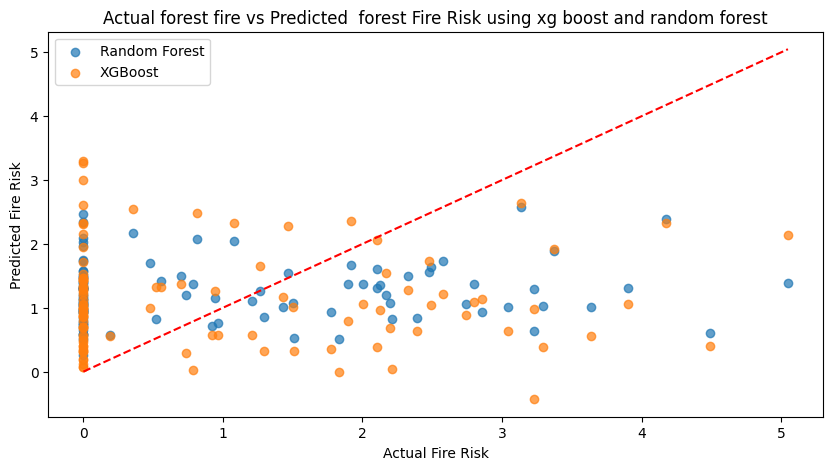

In [87]:
#displaying the plot
visualize_predictions(y_test, y_pred_rf, y_pred_xgb)

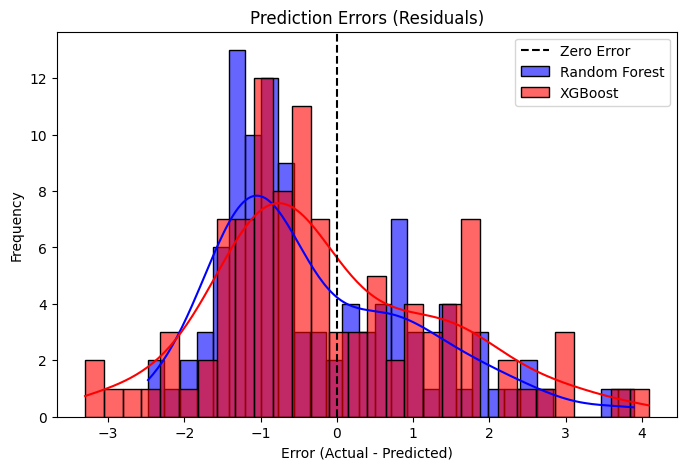

<Figure size 640x480 with 0 Axes>

In [88]:
#displaying the plot
visualize_errors(y_test, y_pred_rf, y_pred_xgb)

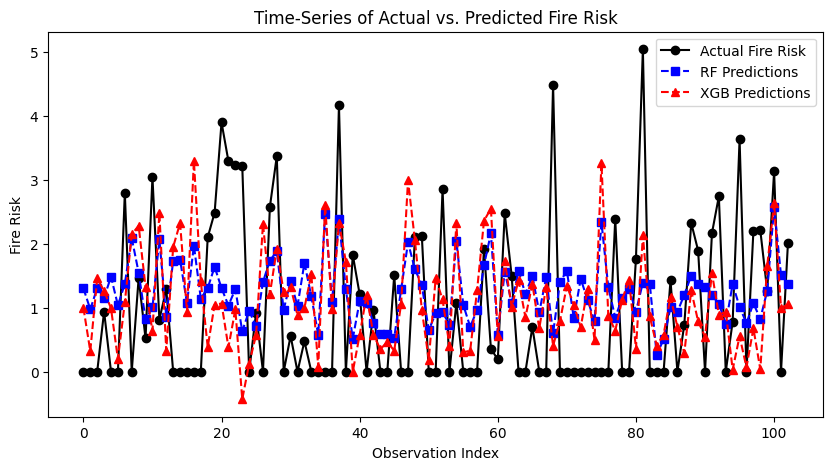

<Figure size 640x480 with 0 Axes>

In [89]:
#displaying the plot
visualize_time_series(y_test,y_pred_rf,y_pred_xgb)